# Insights Dervied through Internet Usage Worldwide
<b>Created by : Gaganpreet Kaur Baansal, Welisa Lewis</b>

<b>Data Sources:</b><br>

    1. https://www.kaggle.com/sudalairajkumar/undata-country-profiles#country_profile_variables.csv 
    2. https://knoema.com/atlas/topics/Telecommunication/Telecomm-Services/Secure-Internet-servers 
    3. https://knoema.com/atlas/topics/Telecommunication/Internet-Users/Share-of-the-Internet-users 
    4. https://drive.google.com/file/d/0Bx1Nsg-bc9ovX0h4SnJ1SFc5Q2c/view 
       Obtained from HCR lab dataset : http://ocslab.hksecurity.net/Datasets/web-hacking-profiling 
    5. https://ourworldindata.org/grapher/number-with-depression-by-country

<b>References:</b><br>
    1 https://stackoverflow.com/questions/49413005/replace-multiple-substrings-in-a-pandas-series-with-a-value <br>
    2 https://plotly.com/python/bubble-charts/ <br>
    3 https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d <br>
    4 https://plotly.com/python/bar-charts/
    5 https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p <br>
    6 https://stackoverflow.com/questions/39141856/capitalize-first-letter-of-each-word-in-the-column-python<br>
    7 https://plotly.com/python/treemaps/ <br>
    8 https://plotly.com/python/line-and-scatter/ <br>
    9 https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php

<b>Introduction:</b>

Internet is a very powerful tool today and it has been around for more than two decades now. In this project, we would like to explore some insights about countries and how they're related to internet usage. We have analyzed data to get correlations between internet usage and various other statistics of a country. Some of the insights we focused on is as follows: <br>
<b>1. Population of a country vs Internet Usage<br>2. Internet usage vs Mental illness<br>3. GDP per capita of a country vs Internet usage of a country<br>4. Internet usage vs Security Breaches<br>5. Secure Servers in a country vs No. of Data Breaches</b><br>



<b>Notes: </b> <br>

1  Internet usage is defined as internet users as a percentage of the population

2  Pearson's correlation coefficient (r) is used to determine the correlation between two variables.<br>
2.1  If r =0 there is no correlation between the variables. <br>
2.2  If r = 0.1 to 0.3 or r=-0.1 to -0.3 then there is a small positive or small negative correlation between the variables respectively. <br>
2.3  If r=0.3 to 0.5 or r =-0.3 to -0.5 then there is a medium positive or medium negative correlation between the variables respectively. <br>
2.4  If r=0.5 to 1 or r =-0.5 to -1 then there is a large positive or large negative correlation between the variables respectively.

In [2]:
#Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [10]:
# Main function to read all the data files

if __name__ == '__main__':
    
    dir = "C:/Users/welis/Desktop/final_project_2020Sp/Data/"
    secure_servers = pd.read_excel(dir+"Secure_Internet_Servers_Worldwide.xlsx")
    internet_users = pd.read_excel(dir+"Share_of_the_Internet_users_Worldwide.xlsx")
    country_profiles = pd.read_csv(dir+"Country_Profiles.csv")
    data_breaches = pd.read_csv(dir+"databreaches.csv",encoding='latin-1')
    mental_health_df = pd.read_csv(dir+"number_with_depression_by_country.csv",)
    worldwide_internet_usage = pd.read_excel(dir+"Individuals_using_the_Internet(Uptill 2019).xls")

In [11]:
# Writing function to remove Nan's

def remove_null(dataframe):
    """
    This function takes dataframe to remove the Nan values from the specific column name
    param1: The dataframe for whose column we want to remove Nan's from
    
    return: The dataframe with no Nan values in the specific column
    """
    dataframe = dataframe.dropna()
    return dataframe
    

In [12]:
# Writing function to replacing values

def replace_values(dataframe, values_dict, column_name):
    """
    This function takes dataframe and the dictionary containing the specific column that we want to update the values of
    param1: The dataframe for whose columns we want to rename
    param2: A dictionary containing the orginal column values and the new values as the key value pair
    param3: The column name of the dataframe whose values we want to update
      
    return: The dataframe with updated values in tha particular column
    """
    dataframe[column_name] = dataframe[column_name].replace(values_dict, regex=True)
    return dataframe
    

In [13]:
# Writing functions to rename columns

def rename_columns(dataframe, column_dict):
    """
    This function takes dataframe and the dictionary containing the specific column that we want to update the values of
    param1: The dataframe for whose columns we want to rename
    param2: A dictionary containing the orginal column name and the new name as the key value pair
      
    return: The dataframe with updated column name
    """
    dataframe.rename(columns=column_dict, inplace=True)
    return dataframe

In [33]:
def plot_world_map(dataframe):
    """
    This function is used to display the world map and it gives us the breakdown of internet usage all over the world.
    The countries with darker shades have higher internet usage compared to countries with lighter shade.
    
    param : dataframe
    return: plot
    
    """
    variable = "2017"
    vmin, vmax = 120, 220

    #Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap="PuRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
    #Empty array for the data range
    sm._A = []

  
    fig = dataframe.plot(column=variable, cmap="Blues",figsize=(20,20))
    
    plt.title("Internet Usage over the world")
    #try adding interactivity
    return fig

In [15]:
def plot_bar_graph(x, y, title, x_label , y_label):
    """
    This function the x and y co-ordinates to plot a bar graph
    param1: The dataframe for whom we want to plot bar graph
    param2: The value for the x co-ordinate
    param3: The value for the y co-ordinate
    param4: The title of the bar graph
    param5: The x_label of the bar graph
    param6: The y_label of the bar graph
      
    return: The bar graph plot
    
    """

    fig, ax = plt.subplots(figsize=(15,5))
    frequency = y
    points = x
    ax.bar(points, frequency)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
   
    return plt
                  
#     plt.show()


In [50]:
def scatter_plot(dataframe,x,y,color,size,hover_name,log_x,size_max):
    """
    This function is used to plot a scatter plot for the GDP of a couuntry against the average internet usage over the years.
    
    param : Dataferame
    
    return:scatter plot
    """
    fig = px.scatter(dataframe, x=x, y=y,
        color=color,size= size,
                 hover_name=hover_name, log_x=log_x, size_max=size_max)
    
#      fig = px.scatter(dataframe, x="GDP per capita (current US$)", y="Average Internet usage over the years",
#         color="Country",size= "Average Internet usage over the years",
#                  hover_name="country", log_x=True, size_max=60)
#     return fig
    return fig

In [17]:
def data_breach_plot(dataframe):
    """
    This function is used to create a scatter plot for no. of data breaches, against the average internet usage.
    
    param : dataframe
    
    return: scatter plot
    """
    fig = px.scatter(dataframe, x="No. of Data Breaches", y="Average Internet usage over the years")
    
    return fig

In [18]:
def plot_treemap(dataframe):
    """
    This function is used to create a treemap for the no.of secure servers in a country against the no. of data breaches.
    
    param : dataframe
    return : treemap plot
    
    """
    fig = px.treemap(dataframe, path=['Country'], values='No.of Secure Servers',
                  color='No. of Data Breaches', hover_data=['Country'],
                  color_continuous_scale='PuOr')
    return fig

In [19]:

def check_correlation(dataframe, col_list):
    """
    This function is designed to check the correlation between two columns of a dataframe
    param1: The dataframe for whose column we need to check the correlation
    param2: A list of columns to check the correlation in
    
    return: The correlation value
    """
    corr_value = dataframe[col_list[0]].corr(dataframe[col_list[1]],method ="pearson")
    
    return corr_value
    

In [20]:
# For displaying world map

shapefile = 'C:/Users/Acer/Desktop/final_project_2020Sp/110m_cultural/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.head()

NameError: name 'gpd' is not defined

# Hypothesis 1 :

# Hypothesis 1.1 :  We assume that countries with larger populations have greater internet usage.

Our general assumption is that countries that have a larger population have more resources compared to countries with a lower population, therefore countries with larger populations have easier access to the Internet. Thus <b>we assume that countries with larger populations would have greater internet usage.</b>

In [21]:
#Removing discrepancies in the country column of various dataframes
# Sorting alphabetically
country_profiles = country_profiles.sort_values('country')
internet_users = internet_users.sort_values('Location')

# c_df = pd.DataFrame(country_profiles['country'])
# i_df = pd.DataFrame(internet_users['Location'])


#Updating all the countries name
replacement = { 'Central African Rep.' : 'Central African Republic',
                'Congo (Dem. Rep.)' : 'Democratic Republic of the Congo',
               "Dem. People's Rep. of Korea" : "Democratic People's Republic of Korea",
               'Dominican Rep.': "Dominican Rep." ,
               'Falkland (Malvinas) Is.' : "Falkland Islands (Malvinas)",
               'Hong Kong, China' : "China, Hong Kong SAR", 
               'Korea (Rep. of)' : "Republic of Korea",
               'Lao P.D.R.' : "Lao People's Democratic Republic" , 
               'Macao, China' : "China, Macao SAR", 
               'Micronesia' : "Micronesia (Federated States of)",
               'Nepal (Republic of)' : "Nepal", 
               'Swaziland (Eswatini)' : "Swaziland",
               'TFYR Macedonia' : "The former Yugoslav Republic of Macedonia", 
               'United States' : "United States of America", 
               'Venezuela' : "Venezuela (Bolivarian Republic of)",
               'Russian Federation' : 'Russia',
               'Bolivia (Plurinational State of)': 'Bolivia'
              }

replacement1 = {'United States' : "United States of America"}
replacement2 = {'Russian Federation' : 'Russia', "Bolivia (Plurinational State of)" : 'Bolivia'}

colname1 = country_profiles.columns[0]
colname2 = internet_users.columns[1]
colname3 = mental_health_df.columns[0]

country_profiles = replace_values(country_profiles, replacement2, colname1)
internet_users= replace_values(internet_users, replacement, colname2)
mental_health_df = replace_values(mental_health_df, replacement1, colname3)


In [22]:
#Creating datasets as per use
country_population = country_profiles[['country','Region','Population in thousands (2017)']]
internet_usage = internet_users[['Location','2017']]

In [23]:
#Merging the datasets to draw insights
insights1 = country_population.merge(internet_usage,left_on="country",right_on ="Location",how ="left")

#Dropping all the NaN values
insights1 = remove_null(insights1)


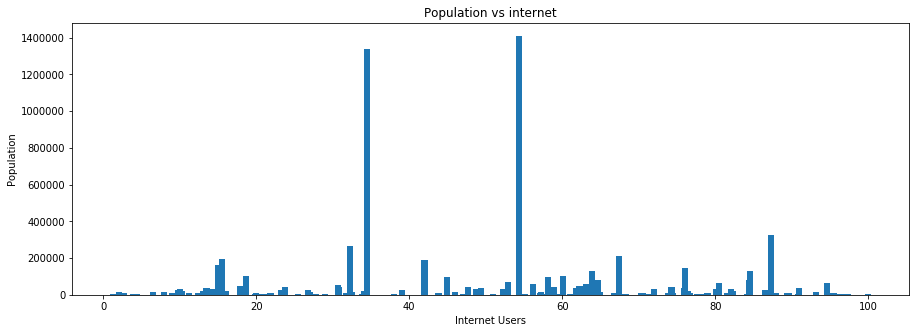

In [24]:

#Sorting by ascending order
insights1 = insights1.sort_values(by = ["Population in thousands (2017)"], ascending =False)

y = insights1["Population in thousands (2017)"]
x = insights1["2017"]
title = 'Population vs internet'
x_label = 'Internet Users'
y_label = 'Population'

plt = plot_bar_graph(x, y, title, x_label , y_label)
plt.show()

<b><u>Conclusion for Hypothesis 1.1 :</u></b><br>
<b>From the trend seen above, we can conclude that internet usage of a country does not depend on the population. So our hypothesis that countries with larger populations have higher internet usage does not hold true. On the contrary it is seen that countries with comparatively lower population have higher internet usage</b>

# World Map indicating Internet Usage Distribution worldwide

In [25]:
#Creating a dataset for the world map
merged = gdf.merge(insights1, left_on = 'ADMIN', right_on = 'country',how="outer")
plot_world_map(merged)


NameError: name 'gdf' is not defined

# Hypothesis 1.2 : There exists a trend between internet usage and mental illness (i.e the greater the number of internet users the higher the number of people having mental health disorders)

The availability of Internet has caused a surge in socail media platforms over the last decade, although social media platforms have been a blessing, it certainly has a few drawbacks. One of the nagative aspects of social media platforms is it's affect on an individual's mental health. Excessive use of social media  may tend to cause anxiety, depression, stress and other forms of mental illness. Therefore we assume that there is a relationship between internet usage and mental illness.

In [26]:
# Depressive disorders - no of people having depression in millions
# number of Internet users as % of total population

year = [2017]
mental_health_df = mental_health_df[mental_health_df['Year'].isin(year)]

#Renmaing the column
column_dict = {"Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)": 'Depressive disorders'}
mental_health_df = rename_columns(mental_health_df, column_dict)


country_population_2017 = country_profiles[['country','Population in thousands (2017)']]

#Merging the two datasets : mental_health_df and country_population_2017
cumulative_df = country_population_2017.merge(mental_health_df,left_on="country",right_on ="Entity",how ="left")


#Creating new column for Percentage of Depressed People
cumulative_df = remove_null(cumulative_df)

cumulative_df["% of Depressed People"] = cumulative_df["Depressive disorders"].div(cumulative_df["Population in thousands (2017)"]).round(2)


#Merging internet users and cumulative dataset
cumulative_df = cumulative_df.merge(internet_usage,left_on="country",right_on ="Location",how ="left")

#Renmaing the column
col_dict = {"2017" : '% of Internet Users'}
cumulative_df.rename(columns={"2017" : '% of Internet Users'}, inplace=True)

# cumulative_df = rename_columns(cumulative_df, col_dict)

# Dropping NAN values
cumulative_df = cumulative_df[pd.notnull(cumulative_df["Location"])]

#Dropping multilple country columns
cumulative_df = cumulative_df.drop(columns=['Entity', 'Location'])

#Rounding the values
cumulative_df['% of Internet Users'] = cumulative_df['% of Internet Users'].round(2)

#Checking correlation
col_list = [cumulative_df.columns[5], cumulative_df.columns[6]]
corr_value = check_correlation(cumulative_df, col_list)


In [27]:
corr_value

0.5988824801940084

Acoording to pearson's correlation formula, the above correlation value indicates that the two variables have a large positive correlation. Therefore, we can say that if internet usage is high there is a larger group of individuals suffering from mental illness in that particular country.

In [29]:
countries = [ 'Canada', 'Bangladesh', 'India','United Kingdom', 'United States of America', 'Somalia', 'Sri Lanka']

Specific_country_df = cumulative_df.loc[cumulative_df['country'].isin(countries)]

Specific_country_df = Specific_country_df[['country', '% of Depressed People', '% of Internet Users']]

countries = [ 'Bangladesh', 'Canada', 'India','Somalia', 'Sri Lanka','United Kingdom', 'United States of America']

fig = go.Figure(data=[
    go.Bar(name='% of Depressed People', x=countries, y=[36.60, 39.29, 34.12 , 29.41, 37.08, 43.87, 47.77]),
    go.Bar(name='% of Internet Users', x=countries, y=[15.00, 91.00,34.45, 2.00, 34.11, 94.62, 87.27])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

<u><b>Conclusion for Hypothesis 1.2:</u></b><br>
<b>Through our analysis, we found that the no. of depressed people and the no. of internet users in a country have a large positive correlationship. From the visualization above, we can see that there are a few countries that have a larger no. of internet users compared to no. of depressed people and vice versa. Therefore our hypothesis that the greater the number of internet users in a country the greater the no. of individuals affected by mental illness does holds true for the countries.</b>

# Hypothesis 1.3 : There is a positive correlation between the GDP per capita of a country and internet users of that country.

We assume that the countries which have higher GDP per capita values are categorized as developing countries, such devloped or dveloping countries have easier access to the Internet. Threfore therefore there would be a positive correlation between the GDP per capita of a country and it's internet usage.
 

In [31]:
country_GDP = country_profiles[['country','GDP per capita (current US$)','Population in thousands (2017)']]
sum_int_users = internet_users.iloc[:,1:].sum(axis=1)
average_int_usage = sum_int_users.div(11)
location = internet_users["Location"]
insights2= pd.concat([location, average_int_usage], axis=1)
insights2.columns = ["Country","Average Internet usage over the years"]
GDP_vs_int_usage = insights2.merge(country_GDP,left_on="Country",right_on="country",how="left")

In [52]:
x="GDP per capita (current US$)"
y="Average Internet usage over the years"
color="Country"
size= "Average Internet usage over the years"
hover_name="country"
log_x=True 
size_max=60

scatter_plot(GDP_vs_int_usage,x,y,color,size,hover_name,log_x,size_max)

<b><u>Conclusion for Hypothesis 1.3: </u></b><br>
<b> From the visualization above we can conclude, that countries with higher GDP per capita values tend to have a higher average of internet users.</b>

# Hypothesis 2 :We expect that countries with higher internet usage are more prone to security breaches.

Countries that have higher internet usage will have higher volumes of personal data being collected. Therefore, we assume that these countries will be more prone to security breaches.

In [34]:
data_breaches_info = data_breaches[["Date","Country"]]

#filtering out data, to take into consideration breaches after 2000.
# data_breaches_info["Date"] = data_breaches_info[(data_breaches["Date"] >'2000-1-1')]

data_breaches_info.loc[data_breaches_info["Date"] > '2000-1-1']

#dropping nan values
data_breaches_info = remove_null(data_breaches_info)


# data_breaches_info = data_breaches_info["Country"].astype(str)
data_breaches_info = data_breaches_info.astype({"Country": str})

data_breaches_per_country = pd.DataFrame(data_breaches_info["Country"].value_counts().rename_axis('Country').reset_index(name='No. of Data Breaches'))

#Filtering out rows that have country as Unknown
data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("UNKNOWN")]

data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("Unknown")]

In [35]:
#df.Geo.str.replace("[({':]", "") #https://python-forum.io/Thread-Removing-characters-from-columns-in-data-frame
# data_breaches_per_country["Country"] = data_breaches_per_country.Country.str.replace("[b']","")

In [38]:
#Converting country names to lower case
data_breaches_per_country["Country"] = data_breaches_per_country["Country"].str.capitalize()

#dropping duplicate values
data_breaches_per_country = data_breaches_per_country.drop_duplicates(subset="Country")

data_breach_int_users = insights2.merge(data_breaches_per_country,left_on="Country",right_on="Country",how= "left")

data_breach_int_users = remove_null(data_breach_int_users)

In [39]:
data_breach_plot(data_breach_int_users)

<u><b>Conclusion for Hypothesis 2: </b></u><br>
<b>We can conclude that there isn't a strong linear relationship between data breaches and average internet usage over the years.Therefore our proposed hypothesis does not hold true.</b>
    

# Suggestion for Hypothesis 2

Whether the population of a country plays a role in the no. of databreaches?

In [58]:
data_breaches_vs_population = data_breaches_per_country.merge(country_population, right_on="country",left_on="Country",how="left")

In [59]:
data_breaches_vs_population = remove_null(data_breaches_vs_population)

In [60]:
data_breaches_vs_population

,Country,No. of Data Breaches,country,Region,Population in thousands (2017)
1,Spain,5665,Spain,SouthernEurope,46354.0
2,Brazil,5302,Brazil,SouthAmerica,209288.0
3,Germany,4088,Germany,WesternEurope,82114.0
4,France,3681,France,WesternEurope,64980.0
5,United Kingdom,3628,United Kingdom,NorthernEurope,66182.0
...,...,...,...,...,...
229,Cambodia,1,Cambodia,South-easternAsia,16005.0
230,Turkmenistan,1,Turkmenistan,CentralAsia,5758.0
234,Lesotho,1,Lesotho,SouthernAfrica,2233.0
237,Mali,1,Mali,WesternAfrica,18542.0


In [54]:
x="Population in thousands (2017)"
y="No. of Data Breaches"
color="Country"
size= "No. of Data Breaches"
hover_name="country"
log_x=True 
size_max=50

scatter_plot(data_breaches_vs_population,x,y,color,size,hover_name,log_x,size_max)

<b>Conclusion:</b><br>
Through our visualization we can see that the countries with higher populations are more prone to data breaches.

# Hypothesis 3: We expect that countries with higher secure internet servers would have lesser cases of data breaches

The countries that have higher no. of secure servers will be well prepared for data breaches. Therefore we assume that the countires with higher number of seccure servers would have lesser data breaches.

In [40]:
secure_servers =  secure_servers[["Country","2018"]]
    
secure_servers = remove_null(secure_servers)

data_breaches_per_country["Country"] = data_breaches_per_country.Country.str.title()

server_data_breach = secure_servers.merge(data_breaches_per_country,left_on="Country",right_on="Country",how="left")

server_data_breach = remove_null(server_data_breach)

server_data_breach.columns = ["Country","No.of Secure Servers","No. of Data Breaches"]

In [41]:
plot_treemap(server_data_breach)

<b><u> Conclusion for Hypothesis 3:</b></u><br>
<b>Through the treemap above we can see that the countries that have higher no. of secure servers are also prone to more data breaches.Therefore our hypothesis does not hold true</b>
